# Wine Case Analysis: *Wine Spectator*'s Top 100 Wines, 1988-2020
List available online on *Wine Spectator*'s [Top 100 Lists web site](https://top100.winespectator.com/lists/).

## File Setup

In [230]:
# import and initialize main python libraries
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import bar_chart_race as bcr
import seaborn as sns

# import libraries for file navigation
import os
import shutil
import glob
from pandas_ods_reader import read_ods

# import other packages
from scipy import stats
from sklearn import linear_model

# import geo packages
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

# import Geopy packages
import geopy
from geopy.geocoders import Nominatim

In [231]:
# initialize vizualization set
sns.set(style="whitegrid", palette="colorblind", color_codes=True)
sns.mpl.rc("figure", figsize=(10, 6))

# Jupyter Notebook
%matplotlib inline

## Dataframe Exploration

In [232]:
# Note: save CSV files in UTF-8 format to preserve special characters.
df_Wine_00 = pd.read_csv('./Wine_Hier00.csv')
df_Wine_01 = pd.read_csv('./Wine_Hier01.csv')
df_GeoCache = pd.read_csv('./GeoCache.csv')
df_Flag = pd.read_csv('./emoji_list.csv')

In [233]:
df_Wine_00.shape

(3304, 25)

In [234]:
df_Wine_00 = df_Wine_00.rename(columns={'lat': 'Latitude', 'long': 'Longitude'})
df_Wine_00.dtypes

Review_Year           float64
Rank                   object
Vintage                object
Score                 float64
Price                  object
Winemaker              object
Wine                   object
Wine_Style             object
Grape_Blend            object
Blend_List             object
Geography              object
Cases_Made            float64
Cases_Imported        float64
Reviewer               object
Drink_now             float64
Best_Drink_from       float64
Best_Drink_Through    float64
Review                 object
Hierarchy              object
Address                object
loc                    object
point                  object
Latitude              float64
Longitude             float64
altitude              float64
dtype: object

In [235]:
df_Wine_01 = df_Wine_01.rename(columns={'lat': 'Latitude', 'long': 'Longitude'})
df_Wine_01.dtypes

Review_Year           float64
Rank                   object
Vintage                object
Score                 float64
Price                  object
Winemaker              object
Wine                   object
Wine_Style             object
Grape_Blend            object
Blend_List             object
Geography              object
Cases_Made            float64
Cases_Imported        float64
Reviewer               object
Drink_now             float64
Best_Drink_from       float64
Best_Drink_Through    float64
Review                 object
Hierarchy              object
Address                object
loc                    object
point                  object
Latitude              float64
Longitude             float64
altitude              float64
dtype: object

In [236]:
df_Wine_01.shape

(3304, 25)

In [237]:
df_Wine_01.shape

(3304, 25)

In [238]:
# CSV of wines is retaining a blank row at the end of the dataset. Remove the last row to prevent data type errors.

# number of rows to drop
n = 1

df_Wine_00.drop(df_Wine_00.tail(n).index, inplace = True)
df_Wine_01.drop(df_Wine_01.tail(n).index, inplace = True)

In [239]:
# Review_Year
# Convert Review_Year from float to int
df_Wine_00['Review_Year'] = df_Wine_00['Review_Year'].astype(int)
df_Wine_01['Review_Year'] = df_Wine_01['Review_Year'].astype(int)

In [240]:
df_GeoCache.shape

(1228, 8)

In [241]:
df_Flag.shape

(19, 3)

In [242]:
df_Wine_00.sample(10)

,Review_Year,Rank,Vintage,Score,Price,Winemaker,Wine,Wine_Style,Grape_Blend,Blend_List,...,Best_Drink_from,Best_Drink_Through,Review,Hierarchy,Address,loc,point,Latitude,Longitude,altitude
2607,1994,5,1992,93.0,20,Ferrari-Carano,Chardonnay Alexander Valley,White,Chardonnay,NaN,...,1994.0,NaN,"Serves up a lot of ripe, generous fruit flavor...",Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
2749,1993,47,1990,93.0,25,Dalla Valle,Cabernet Sauvignon Napa Valley,Red,Cabernet Sauvignon,NaN,...,1998.0,2000.0,"Deep, dense and delicious, bursting with plum,...",Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
1796,2003,95,2001,93.0,47,Josmeyer,Riesling Alsace Les Pierrets,White,Riesling,NaN,...,2005.0,2012.0,"Etched in stone. Dry and tightly wound, this c...",Hierarchy_00,France,France,"(46.603354, 1.8883335, 0.0)",46.603354,1.888333,0.0
2942,1991,40,1988,95.0,180,Joseph Drouhin,Montrachet Marquis de Laguiche,White,Chardonnay,NaN,...,1991.0,1996.0,"Has wonderful aromas and intense, concentrated...",Hierarchy_00,France,France,"(46.603354, 1.8883335, 0.0)",46.603354,1.888333,0.0
2383,1997,82,1995,90.0,15,Dry Creek,Chardonnay Sonoma County,White,Chardonnay,NaN,...,NaN,NaN,"Ultrarich and creamy in style, with layers of ...",Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
2863,1992,61,1989,93.0,36,Kenwood,Cabernet Sauvignon Sonoma Valley Artist Series,Red,Cabernet Sauvignon,NaN,...,NaN,NaN,"Lean, tight, firm, rich and deeply flavored, p...",Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
523,2015,23,2011,94.0,50,Bodegas LAN,Rioja Edición Limitada,Red,Rioja,NaN,...,2015.0,2031.0,"This rich red delivers ripe, racy flavors of b...",Hierarchy_00,Spain,España,"(39.3260685, -4.8379791, 0.0)",39.326068,-4.837979,0.0
2723,1993,21,1990,95.0,30,Château Lagrange,Pomerol,Red,Pomerol,NaN,...,2000.0,NaN,"Dense and powerful, with a breathtaking aftert...",Hierarchy_00,France,France,"(46.603354, 1.8883335, 0.0)",46.603354,1.888333,0.0
373,2017,73,2015,93.0,20,Powell & Son,Riverside Barossa,Red,Blend,"Grenache, Mataro and Shiraz",...,2017.0,2030.0,"A supple, seamless mix of cherry and raspberry...",Hierarchy_00,Australia,Australia,"(-24.7761086, 134.755, 0.0)",-24.776109,134.755000,0.0
1634,2004,33,2002,94.0,26,Cougar Crest,Syrah Walla Walla Valley,Red,Shiraz | Syrah,NaN,...,2004.0,2012.0,"Ripe, beautifully focused and generous, a deli...",Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0


## Pivot on Address

### Hierarchy 00

In [243]:
# Count by Wine Style by Address - All Years
df_Count_WS_All_00 = pd.DataFrame({'Count' : df_Wine_00.groupby(['Wine_Style', 'Address','Latitude','Longitude'])['Score'].count()}).reset_index()
df_Count_WS_All_00.sample(10)

,Wine_Style,Address,Latitude,Longitude,Count
29,Sparkling,USA,39.783730,-100.445882,31
40,White,Portugal,40.033263,-7.889626,1
39,White,New Zealand,-41.500083,172.834408,54
41,White,South Africa,-28.816624,24.991639,22
21,Red,Spain,39.326068,-4.837979,151
23,Red,Uruguay,-32.875555,-56.020153,2
8,Red,Argentina,-34.996496,-64.967282,55
15,Red,Israel,31.531311,34.866765,6
14,Red,Greece,38.995368,21.987713,1
30,White,Argentina,-34.996496,-64.967282,2


In [244]:
# Count by Wine Style - By Review Year
df_Count_WS_ByYear_00 = pd.DataFrame({'Count' : df_Wine_00.groupby(['Review_Year', 'Wine_Style', 'Address','Latitude','Longitude'])['Score'].count()}).reset_index()
df_Count_WS_ByYear_00.sample(10)

,Review_Year,Wine_Style,Address,Latitude,Longitude,Count
299,2007,Sparkling,France,46.603354,1.888333,2
78,1994,Sparkling,France,46.603354,1.888333,1
127,1997,Sparkling,USA,39.783730,-100.445882,1
398,2012,Red,Argentina,-34.996496,-64.967282,2
604,2020,Red,Chile,-31.761336,-71.318770,1
309,2007,White,South Africa,-28.816624,24.991639,2
254,2005,Red,France,46.603354,1.888333,15
466,2014,White,Greece,38.995368,21.987713,2
59,1992,White,New Zealand,-41.500083,172.834408,1
437,2013,Red,USA,39.783730,-100.445882,28


### Hierarchy 01

In [245]:
# Count by Wine Style - All Years
df_Count_All_01 = pd.DataFrame({'Count' : df_Wine_01.groupby(['Wine_Style', 'Address','Latitude','Longitude'])['Score'].count()}).reset_index()
df_Count_All_01.sample(10)

,Wine_Style,Address,Latitude,Longitude,Count
20,Red,"Burgenland, Austria",47.500000,16.416667,1
104,White,"Auckland, New Zealand",-36.852095,174.763180,8
21,Red,"Burgundy, France",47.278087,4.222486,76
29,Red,"Casablanca Valley, Chile",-33.320586,-71.410076,1
93,Sparkling,"California, USA",36.701463,-118.755997,25
69,Red,"Salta, Argentina",-25.107670,-64.349496,2
84,Red,"Washington, USA",38.894992,-77.036558,117
157,White,"Washington, USA",38.894992,-77.036558,33
79,Red,"Umbria, Italy",42.965916,12.490236,2
57,Red,"Murcia, Spain",37.992379,-1.130543,3


In [246]:
# Count by Wine Style - By Review Year
df_Count_ByYear_01 = pd.DataFrame({'Count' : df_Wine_01.groupby(['Review_Year', 'Score', 'Address','Latitude','Longitude'])['Price'].count()}).reset_index()
df_Count_ByYear_01.sample(10)

,Review_Year,Score,Address,Latitude,Longitude,Count
531,1998,99.0,"Burgundy, France",47.278087,4.222486,1
1214,2009,90.0,"Washington, USA",38.894992,-77.036558,1
1948,2019,90.0,"Oregon, USA",43.979280,-120.737257,1
241,1993,91.0,"Oregon, USA",43.979280,-120.737257,1
1905,2018,94.0,"Cachapoal Valley, Chile",-36.461386,-71.729121,1
1521,2013,92.0,"Western Cape, South Africa",-33.546977,20.727530,1
1693,2015,94.0,"Tuscany, Italy",43.458654,11.138920,2
533,1998,100.0,"Bordeaux, France",44.841225,-0.580036,1
1228,2009,91.0,"Washington, USA",38.894992,-77.036558,2
1803,2017,90.0,"Veneto, Italy",45.647666,11.866525,2


## Map Results: World Map
Plot count results at Hierarchy 00 on world map.
### Import Shapefile
* See [World Map Units, 1:10 million (2012)](https://geo.nyu.edu/catalog/stanford-gj285pj7891) from the NYU Spatial Data Repository.
* See [GeoPandas 101: Plot any data with a latitude and a longitude on a map](https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972).

In [247]:
world_map = gpd.read_file('./shapefiles/world/gj285pj7891.shp')

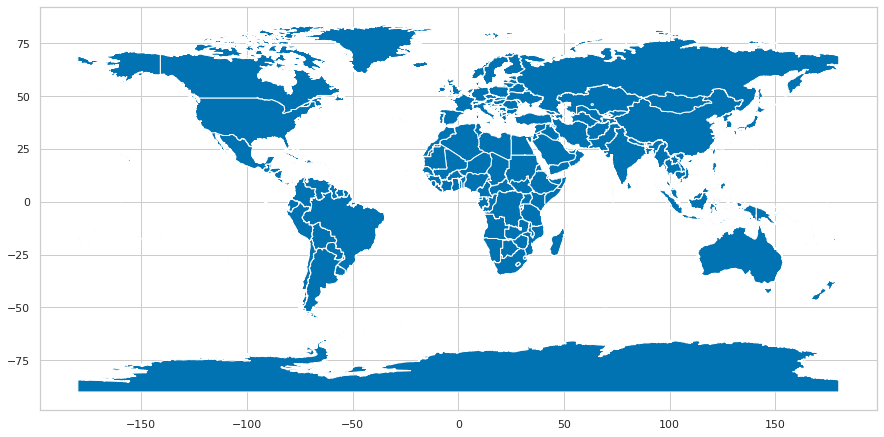

In [248]:
fig, ax = plt.subplots(figsize = (15, 15))
world_map.plot(ax = ax)

In [249]:
# Define a coordinate reference system (CRS)
crs = {'init': 'espg:4326'}

## Plot Counts by Hierarchy 00 (Country) by Wine Style

In [250]:
def count_style_country(wine_style, color):    
    df = df_Count_WS_All_00[(df_Count_WS_All_00.Wine_Style == wine_style)]

    geo_count = [Point(xy) for xy in zip( df['Longitude'], df['Latitude'])]

    geo_df = gpd.GeoDataFrame(
        df, 
        crs = crs, 
        geometry = geo_count
    )

    fig, ax = plt.subplots(figsize = (15, 15))
    
    world_map.plot(ax = ax, alpha = 0.4, color = 'gray')

    geo_df.plot(ax=ax, markersize = geo_df['Count'], color = color, marker = 'o', label = 'Count of Scores')
    plt.legend(prop={'size': 15})
    plt.title(wine_style + '\nCount of Wine Spectator Scores by Country\nReview Years 1988-2020')
    
    plt.savefig('./images/count_scores_by_country_' + wine_style + '.png')

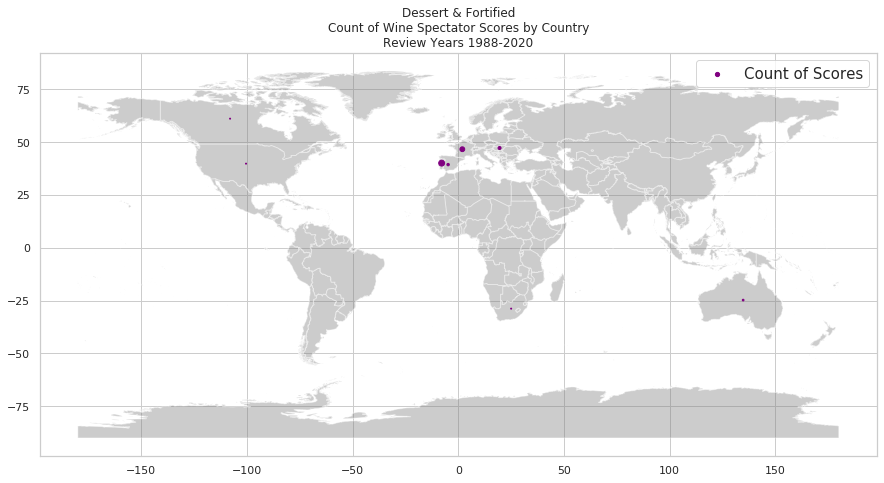

In [251]:
count_style_country('Dessert & Fortified', 'purple')

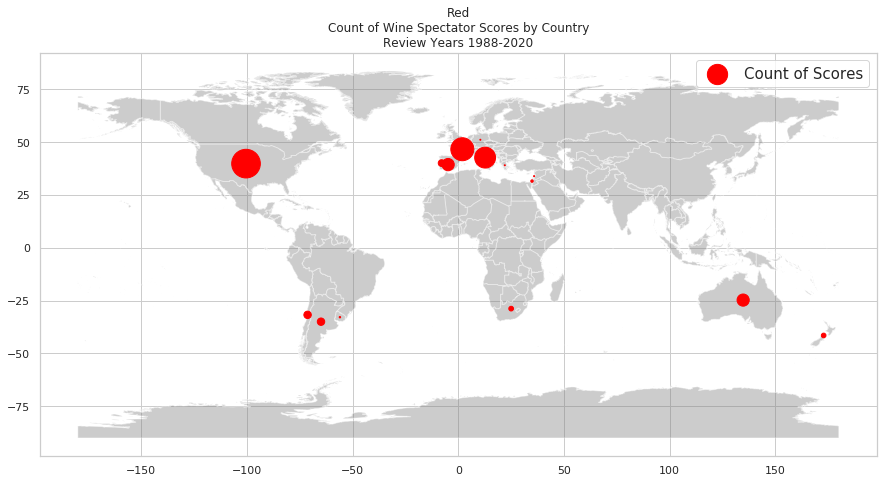

In [252]:
count_style_country('Red', 'red')

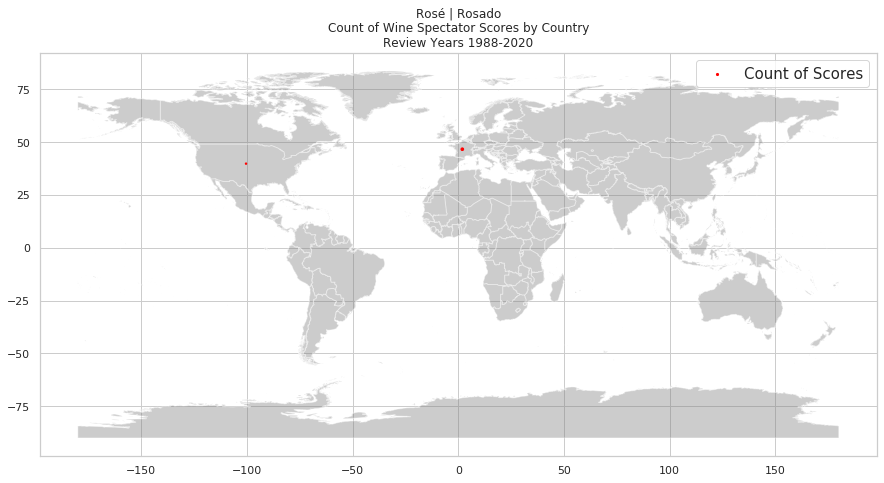

In [253]:
count_style_country('Rosé | Rosado', 'red')

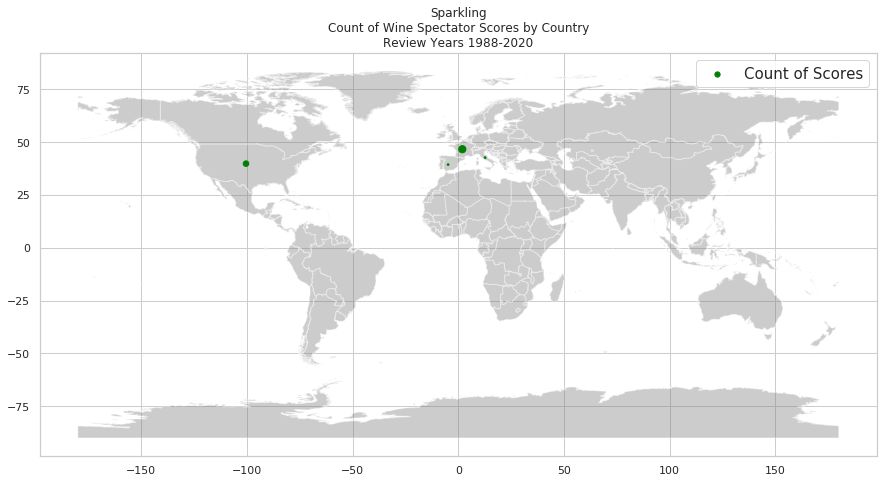

In [254]:
count_style_country('Sparkling', 'green')

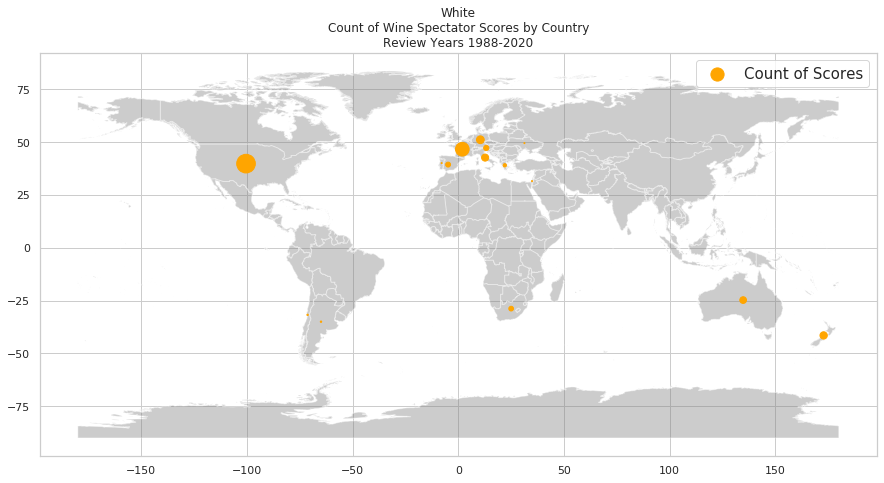

In [255]:
count_style_country('White', 'orange')

## Plot Counts by Hierarchy 01 (within Country)

In [256]:
# import country maps
usa_map = gpd.read_file('./shapefiles/USA/vw421bb8115.shp')
france_map = gpd.read_file('./shapefiles/France/ym781wr7170.shp')
italy_map = gpd.read_file('./shapefiles/Italy/bb489fv3314.shp')

In [257]:
def count_style_subcountry(wine_style, country):    
    df = df_Count_All_01[
        (df_Count_All_01.Wine_Style == wine_style) &
        (df_Count_All_01.Address.str.contains(country) == True)
    ]
    
    if country == 'USA':
        country_map = usa_map
        bounds = 'State'
    elif country == 'France':
        country_map = france_map
        bounds = 'First-Level Administrative Division'
    elif country == 'Italy':
        country_map = italy_map
        bounds = 'First-Level Administrative Division'
    else:
        print('select USA, France, or Italy as country')
        
    if wine_style == 'Dessert & Fortified':
        color = 'purple'
    elif wine_style == 'Red':
        color = 'red'
    elif wine_style == 'Rosé | Rosado':
        color = 'red'
    elif wine_style == 'Sparkling':
        color = 'green'
    elif wine_style == 'White':
        color = 'orange'
    

    geo_count = [Point(xy) for xy in zip( df['Longitude'], df['Latitude'])]

    geo_df = gpd.GeoDataFrame(
        df, 
        crs = crs, 
        geometry = geo_count
    )

    fig, ax = plt.subplots(figsize = (10, 10))
    
    if country == 'USA':
        ax.set(xlim = (-130, -60), ylim = (20, 55))
    
    country_map.plot(ax = ax, alpha = 0.4, color = 'gray')

    geo_df.plot(ax=ax, markersize = geo_df['Count'] * 3, color = color, marker = 'o', label = 'Count of Scores')
    plt.legend(prop={'size': 15})
    plt.title(wine_style + '\nCount of Wine Spectator Scores by ' + bounds +'\nReview Years 1988-2020')
    
    fig.savefig('./images/count_scores_by_' + country + '_' + wine_style + '.png')

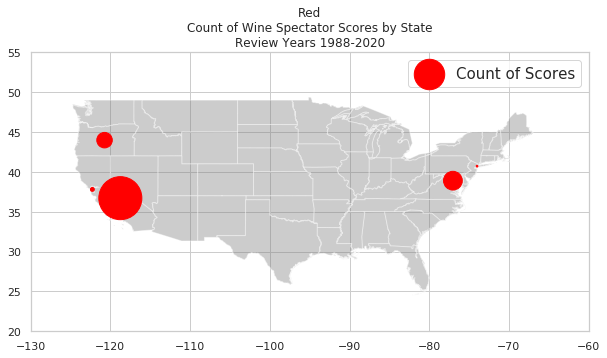

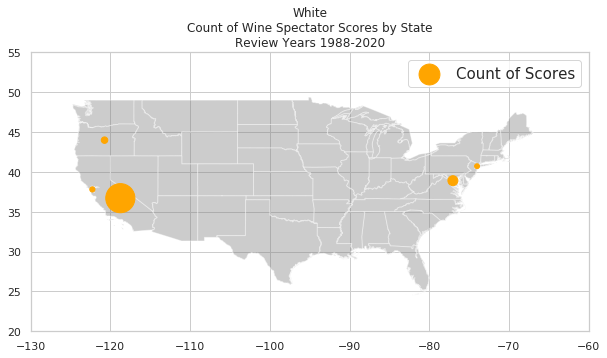

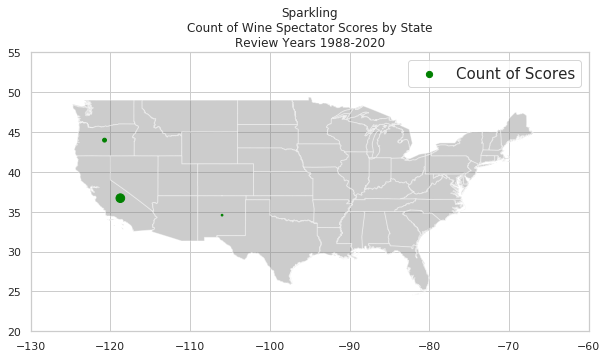

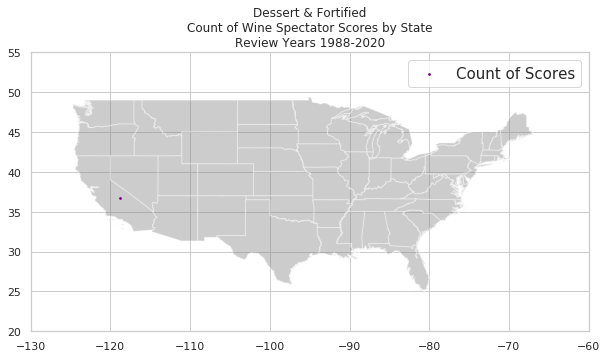

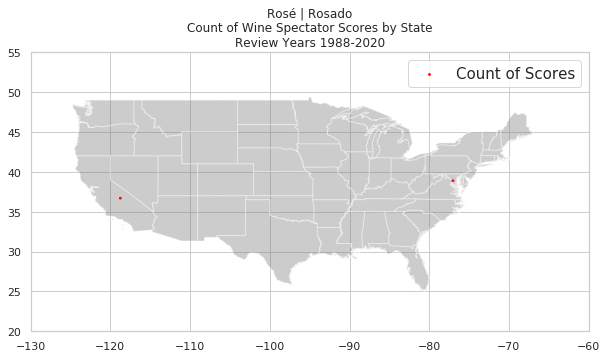

In [258]:
styles = df_Wine_01.Wine_Style.unique()

for style in styles:
    count_style_subcountry(style, 'USA')

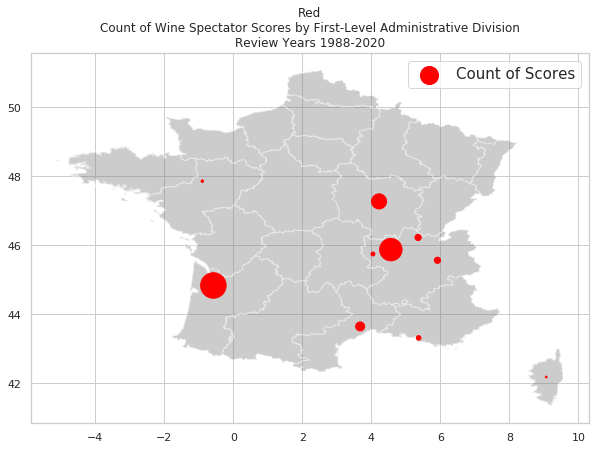

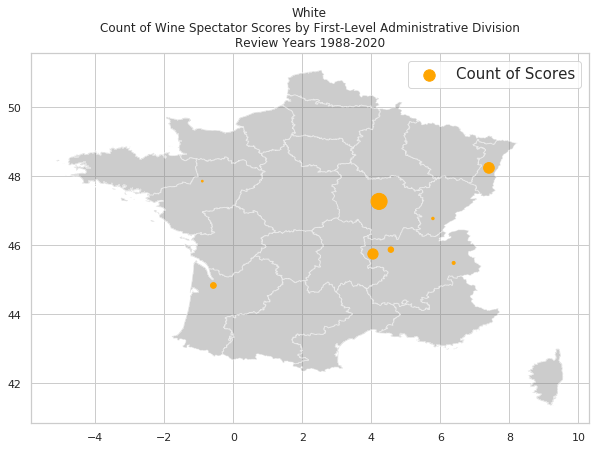

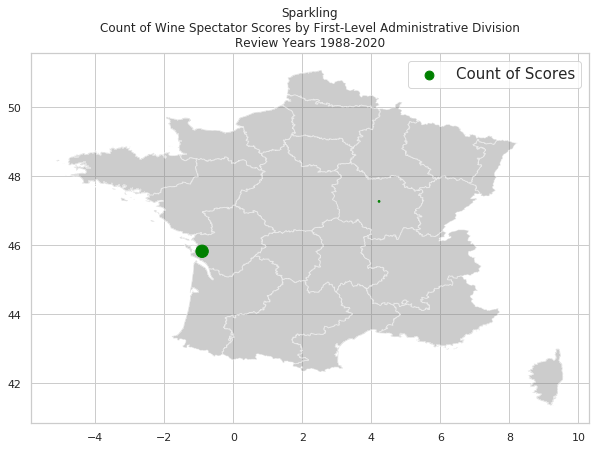

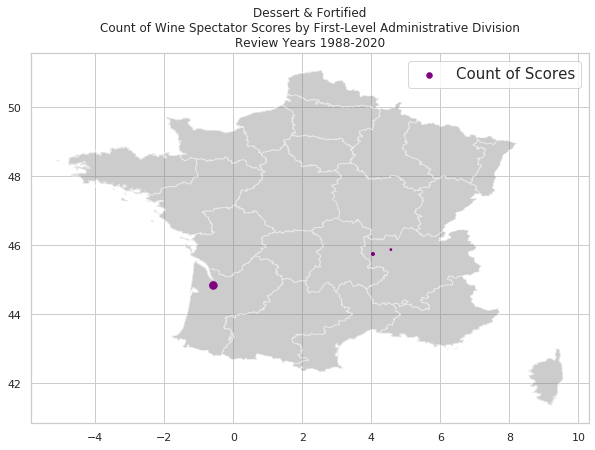

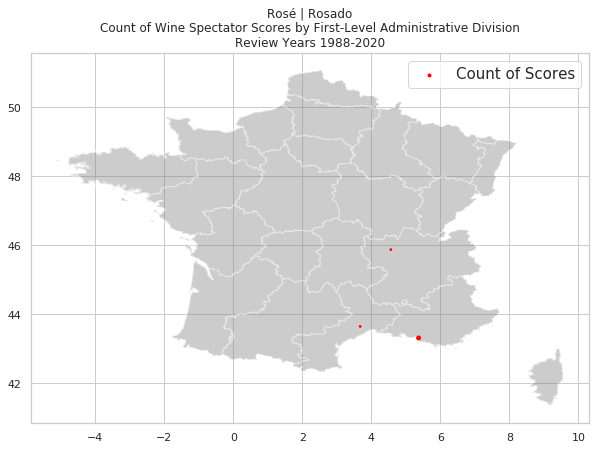

In [259]:
styles = df_Wine_01.Wine_Style.unique()

for style in styles:
    count_style_subcountry(style, 'France')

/home/elizabethwotawa/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
No handles with labels found to put in legend.
/home/elizabethwotawa/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
No handles with labels found to put in legend.


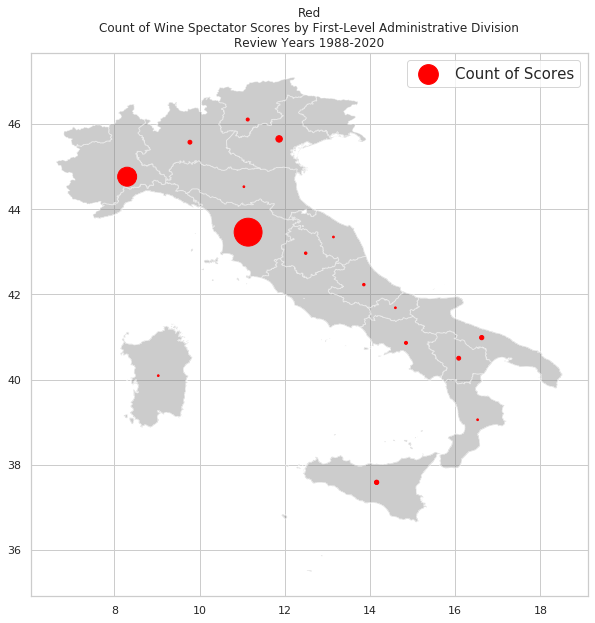

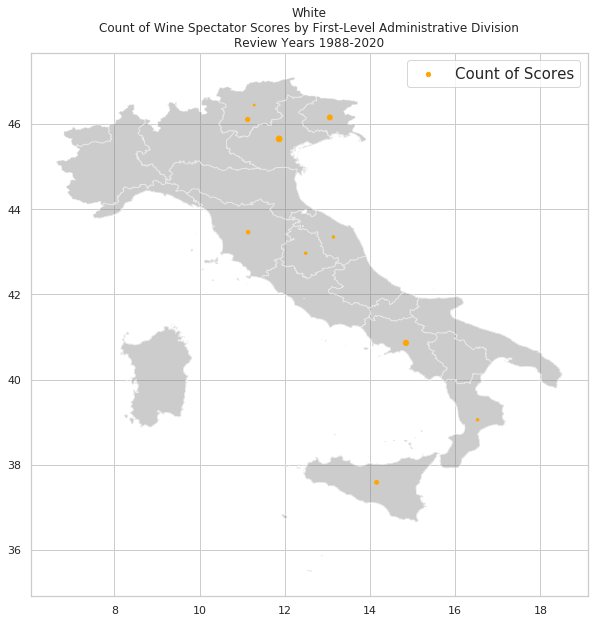

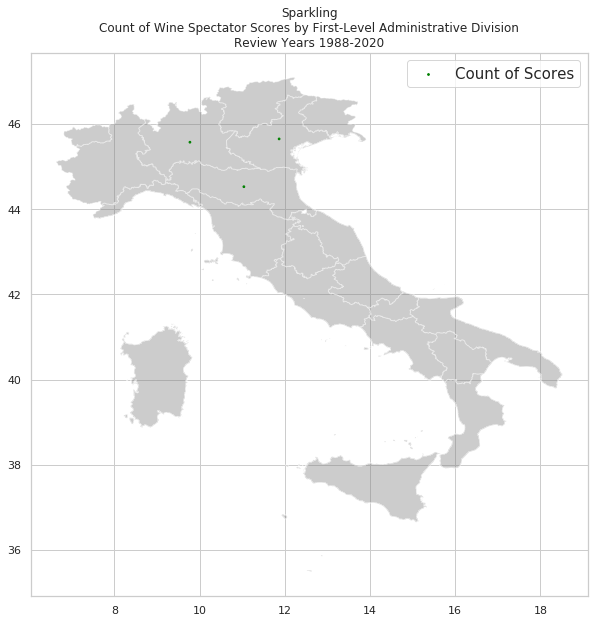

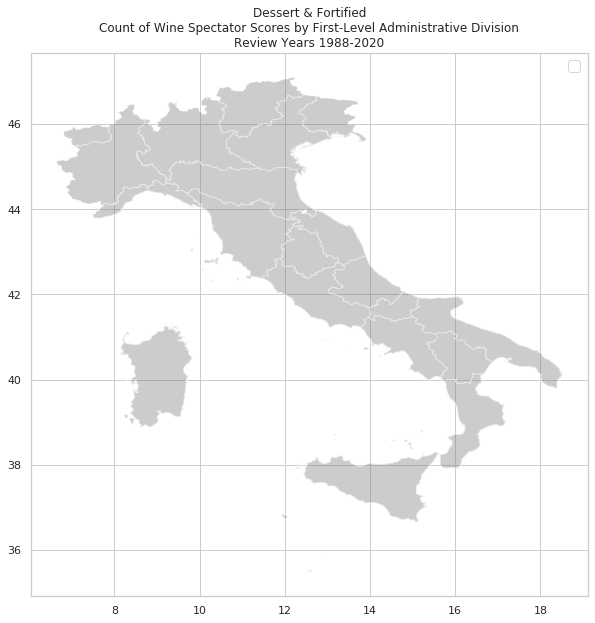

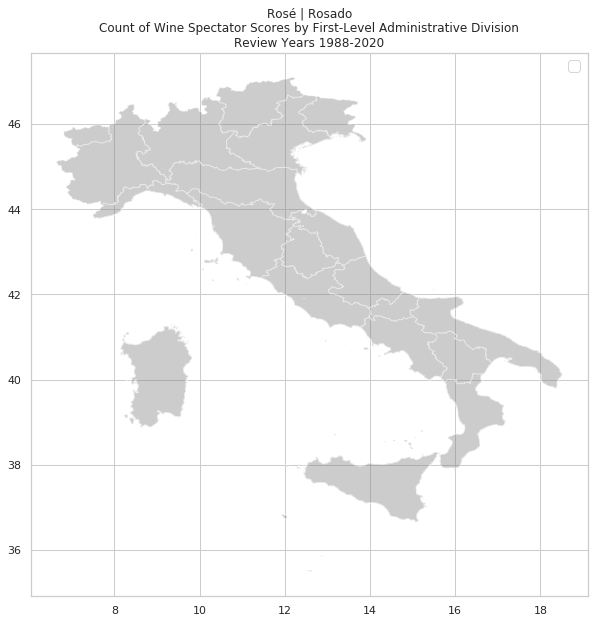

In [260]:
styles = df_Wine_01.Wine_Style.unique()

for style in styles:
    count_style_subcountry(style, 'Italy')